In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [73]:
data = pd.read_csv('Iris.csv')

In [74]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Only using 2 variables

Drop `SepalLengthCm` and `SepalWidthCm` cols

In [76]:
DROP_COLS = ["Id", "SepalLengthCm", "SepalWidthCm"]

In [77]:
def drop_columns(cols_name):
    data.drop(cols_name, axis=1, inplace=True)

In [78]:
drop_columns(DROP_COLS)

In [79]:
data.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [80]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Only Pick Virginica

Nanti sisa nya akan di convert jadi Non-Virginica

In [81]:
data["Species"][data["Species"] != "Iris-setosa"] = "Non-setosa"

/tmp/ipykernel_220/1573446183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Species"][data["Species"] != "Iris-setosa"] = "Non-setosa"


In [82]:
data

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Non-setosa
146,5.0,1.9,Non-setosa
147,5.2,2.0,Non-setosa
148,5.4,2.3,Non-setosa


In [83]:
data["Species"].value_counts()

Non-setosa     100
Iris-setosa     50
Name: Species, dtype: int64

### Create Visualization

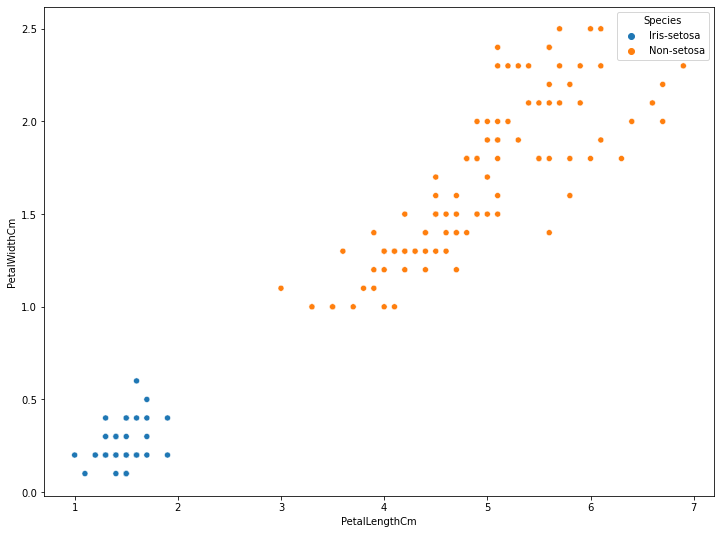

In [84]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=data,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")

plt.show()

### Split Input Output 

In [85]:
def split_input_output(data, output_col):
    X = data.drop(columns=output_col)
    y = data[output_col]
    
    return X, y

In [86]:
X, y = split_input_output(data=data,
                          output_col="Species")

In [87]:
X.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [88]:
X.shape

(150, 2)

In [89]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [90]:
y.shape

(150,)

In [91]:
y.value_counts()

Non-setosa     100
Iris-setosa     50
Name: Species, dtype: int64

### Train Test Split 

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [94]:
print(f"Train Data Shape: {X_train.shape, y_train.shape}")
print(f"Test Data Shape: {X_test.shape, y_test.shape}")

Train Data Shape: ((120, 2), (120,))
Test Data Shape: ((30, 2), (30,))


In [95]:
y_train.value_counts()

Non-setosa     80
Iris-setosa    40
Name: Species, dtype: int64

In [96]:
y_test.value_counts()

Non-setosa     20
Iris-setosa    10
Name: Species, dtype: int64

### Preprocessing

In [97]:
y_train.value_counts()

Non-setosa     80
Iris-setosa    40
Name: Species, dtype: int64

In [98]:
def convert_class(y_train, y_test, class_name):
    y_train = y_train.apply(lambda x: 1 if x == class_name else 0)
    y_test = y_test.apply(lambda x: 1 if x == class_name else 0)
    
    return y_train, y_test

In [99]:
y_train, y_test = convert_class(y_train=y_train,
                                y_test=y_test,
                                class_name="Iris-setosa")

In [100]:
y_train.value_counts()

0    80
1    40
Name: Species, dtype: int64

In [101]:
y_train.value_counts()

0    80
1    40
Name: Species, dtype: int64

In [102]:
y_test.value_counts()

0    20
1    10
Name: Species, dtype: int64

Coba bandingkan model yang pake di Scaling dan tanpa di Scaling

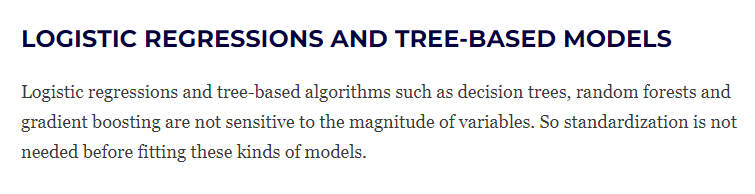

Setelah melakukan eksperimen menggunakan scaling dan tidak menggunakan scaling didapatkan hasil:
- Secara overall, bentuk dari Decision Boundary nya masih sama, cuma beda scale atau range data nya aja
- Apakah karena range data nya tidak begitu jauh sehingga tidak begitu berpengaruh
- Tetapi menariknya adalah hasil metrics accuracy tanpa di scaling jauh lebih bagus daripada yang menggunakan scaling 

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [104]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns = X_train.columns, index = X_train.index)

In [106]:
X_train_scaled

,PetalLengthCm,PetalWidthCm
8,-1.350397,-1.323361
144,1.091105,1.710258
119,0.693652,0.391293
31,-1.293618,-1.059568
19,-1.293618,-1.191465
...,...,...
132,1.034326,1.314568
3,-1.293618,-1.323361
122,1.658897,1.050775
143,1.204664,1.446465


In [107]:
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns = X_test.columns, index = X_test.index)

In [108]:
X_test_scaled

,PetalLengthCm,PetalWidthCm
84,0.409756,0.391293
103,1.034326,0.786982
109,1.318222,1.710258
42,-1.407176,-1.323361
51,0.409756,0.391293
53,0.125860,0.127500
146,0.693652,0.918879
38,-1.407176,-1.323361
120,1.091105,1.446465
57,-0.271593,-0.268190


### Modelling with Logistic Regression 

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
logreg = LogisticRegression()

In [111]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [112]:
y_pred_train_proba = logreg.predict_proba(X_train_scaled)

Fungsi logistic di kasus ini cuma nge prediksi / nge hitung kelas 1 aja. Karena untuk dapetin kelas 0 tinggal 1 - proba_kelas_1

In [113]:
y_pred_train_proba

array([[3.22892841e-02, 9.67710716e-01],
       [9.99841983e-01, 1.58017024e-04],
       [9.93680714e-01, 6.31928592e-03],
       [6.20605434e-02, 9.37939457e-01],
       [4.78817473e-02, 9.52118253e-01],
       [6.20605434e-02, 9.37939457e-01],
       [9.21517280e-01, 7.84827200e-02],
       [8.72103966e-01, 1.27896034e-01],
       [9.78690886e-01, 2.13091137e-02],
       [9.98590231e-01, 1.40976944e-03],
       [2.82305287e-02, 9.71769471e-01],
       [9.72293987e-01, 2.77060127e-02],
       [9.99378904e-01, 6.21095653e-04],
       [9.81492630e-01, 1.85073695e-02],
       [4.19479830e-02, 9.58052017e-01],
       [9.21708999e-01, 7.82910015e-02],
       [3.69094107e-02, 9.63090589e-01],
       [4.19479830e-02, 9.58052017e-01],
       [9.99761858e-01, 2.38141621e-04],
       [9.96811739e-01, 3.18826084e-03],
       [8.38615809e-01, 1.61384191e-01],
       [7.04555929e-02, 9.29544407e-01],
       [4.19479830e-02, 9.58052017e-01],
       [9.75728269e-01, 2.42717311e-02],
       [9.998605

In [114]:
y_pred_train = logreg.predict(X_train_scaled)

In [115]:
y_pred_train

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [116]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [117]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train

1.0

Precision Recall, dll pelajari lagi

In [118]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [119]:
y_pred_test_proba = logreg.predict_proba(X_test_scaled)

In [120]:
y_pred_test_proba

array([[9.87611180e-01, 1.23888205e-02],
       [9.98765837e-01, 1.23416275e-03],
       [9.99908227e-01, 9.17728874e-05],
       [2.83034239e-02, 9.71696576e-01],
       [9.87611180e-01, 1.23888205e-02],
       [9.58925255e-01, 4.10747450e-02],
       [9.97882352e-01, 2.11764818e-03],
       [2.83034239e-02, 9.71696576e-01],
       [9.99726488e-01, 2.73512416e-04],
       [7.98386260e-01, 2.01613740e-01],
       [3.68151907e-02, 9.63184809e-01],
       [2.47969792e-02, 9.75203021e-01],
       [3.22892841e-02, 9.67710716e-01],
       [9.63955217e-01, 3.60447829e-02],
       [7.98386260e-01, 2.01613740e-01],
       [6.19062462e-02, 9.38093754e-01],
       [9.96811739e-01, 3.18826084e-03],
       [3.22892841e-02, 9.67710716e-01],
       [9.99288584e-01, 7.11416284e-04],
       [4.77609069e-02, 9.52239093e-01],
       [9.78746162e-01, 2.12538383e-02],
       [9.99639211e-01, 3.60789044e-04],
       [3.68151907e-02, 9.63184809e-01],
       [1.90090156e-02, 9.80990984e-01],
       [9.995240

In [121]:
y_pred_test = logreg.predict(X_test_scaled)

In [122]:
y_pred_test

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0])

In [123]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

1.0

In [124]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Get Coefficient and Intercept

In [125]:
logreg.coef_

array([[-2.39283449, -2.08026681]])

In [126]:
logreg.intercept_

array([-2.58402274])

In [127]:
print('intercept ', logreg.intercept_[0])
print('classes', logreg.classes_)
pd.DataFrame({'coeff': logreg.coef_[0]}, 
             index=X.columns)

intercept  -2.5840227419047093
classes [0 1]


,coeff
PetalLengthCm,-2.392834
PetalWidthCm,-2.080267


In [129]:
coef_1, coef_2 = logreg.coef_[0]

In [130]:
itc = logreg.intercept_[0]

In [131]:
m_boundary = -coef_1 / coef_2

In [132]:
m_boundary

-1.150253646860135

In [133]:
c_boundary = -itc / coef_2

In [134]:
c_boundary

-1.242159286244222

In [135]:
print(m_boundary, c_boundary)

-1.150253646860135 -1.242159286244222


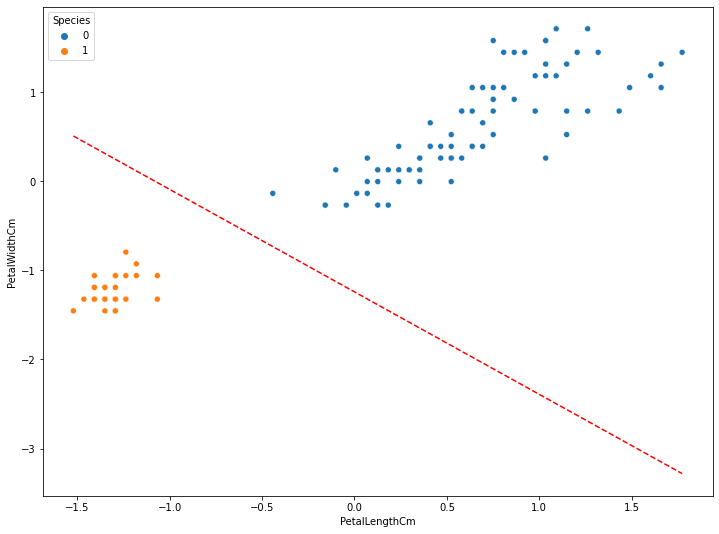

In [136]:
plt.figure(figsize=(12, 9))

data_scaled = X_train_scaled.copy()
data_scaled["Species"] = y_train

sns.scatterplot(data=data_scaled,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")


x_support = np.linspace(data_scaled["PetalLengthCm"].min(), 
                        data_scaled["PetalLengthCm"].max(), 101)
y_support = m_boundary*x_support + c_boundary

plt.plot(x_support, y_support, "--r")
# plt.set_ylim(-6, 6)

plt.show()

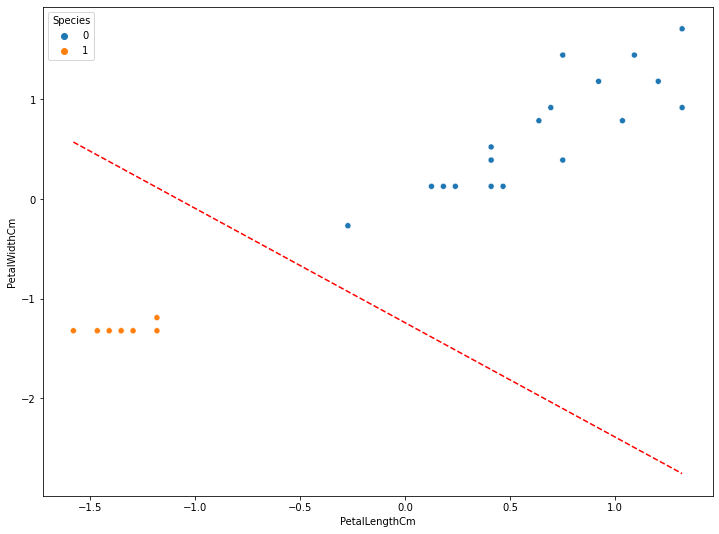

In [137]:
plt.figure(figsize=(12, 9))

data_scaled = X_test_scaled.copy()
data_scaled["Species"] = y_test

sns.scatterplot(data=data_scaled,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")


x_support = np.linspace(data_scaled["PetalLengthCm"].min(), 
                        data_scaled["PetalLengthCm"].max(), 101)
y_support = m_boundary*x_support + c_boundary

plt.plot(x_support, y_support, "--r")
# plt.set_ylim(-6, 6)

plt.show()

### Without Scaling

In [150]:
X, y = split_input_output(data=data,
                          output_col="Species")

### Train Test Split 

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [153]:
print(f"Train Data Shape: {X_train.shape, y_train.shape}")
print(f"Test Data Shape: {X_test.shape, y_test.shape}")

Train Data Shape: ((120, 2), (120,))
Test Data Shape: ((30, 2), (30,))


In [154]:
y_train.value_counts()

Non-setosa     80
Iris-setosa    40
Name: Species, dtype: int64

In [155]:
y_test.value_counts()

Non-setosa     20
Iris-setosa    10
Name: Species, dtype: int64

### Preprocessing

In [156]:
y_train, y_test = convert_class(y_train=y_train,
                                y_test=y_test,
                                class_name="Iris-setosa")

In [157]:
y_train.value_counts()

0    80
1    40
Name: Species, dtype: int64

In [158]:
y_test.value_counts()

0    20
1    10
Name: Species, dtype: int64

### Modeling 

In [159]:
logreg2 = LogisticRegression()

In [160]:
logreg2.fit(X_train, y_train)

LogisticRegression()

In [161]:
y_pred_train_proba = logreg2.predict_proba(X_train)

In [162]:
y_pred_train_proba

array([[2.04261373e-02, 9.79573863e-01],
       [9.99879629e-01, 1.20371439e-04],
       [9.98153817e-01, 1.84618330e-03],
       [3.16085164e-02, 9.68391484e-01],
       [2.86546467e-02, 9.71345353e-01],
       [3.16085164e-02, 9.68391484e-01],
       [9.72747799e-01, 2.72522008e-02],
       [9.30336739e-01, 6.96632608e-02],
       [9.94790143e-01, 5.20985724e-03],
       [9.99409972e-01, 5.90027514e-04],
       [2.35297277e-02, 9.76470272e-01],
       [9.87507047e-01, 1.24929528e-02],
       [9.99705113e-01, 2.94887138e-04],
       [9.86959291e-01, 1.30407087e-02],
       [3.29664183e-02, 9.67033582e-01],
       [9.60250185e-01, 3.97498154e-02],
       [1.77244823e-02, 9.82275518e-01],
       [3.29664183e-02, 9.67033582e-01],
       [9.99829716e-01, 1.70284103e-04],
       [9.98257130e-01, 1.74287030e-03],
       [8.90933793e-01, 1.09066207e-01],
       [4.00623793e-02, 9.59937621e-01],
       [3.29664183e-02, 9.67033582e-01],
       [9.90202655e-01, 9.79734511e-03],
       [9.999802

In [163]:
y_pred_train = logreg2.predict(X_train)

In [164]:
y_pred_train

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [165]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [166]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train

1.0

In [167]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [168]:
y_pred_test_proba = logreg2.predict_proba(X_test)

In [169]:
y_pred_test_proba

array([[9.93718784e-01, 6.28121597e-03],
       [9.99687606e-01, 3.12394172e-04],
       [9.99954960e-01, 4.50395317e-05],
       [1.60465995e-02, 9.83953401e-01],
       [9.93718784e-01, 6.28121597e-03],
       [9.74236144e-01, 2.57638559e-02],
       [9.98767421e-01, 1.23257876e-03],
       [1.60465995e-02, 9.83953401e-01],
       [9.99852641e-01, 1.47358518e-04],
       [8.33238671e-01, 1.66761329e-01],
       [2.59694185e-02, 9.74030581e-01],
       [1.25939994e-02, 9.87406001e-01],
       [2.04261373e-02, 9.79573863e-01],
       [9.79736460e-01, 2.02635400e-02],
       [8.33238671e-01, 1.66761329e-01],
       [4.60094070e-02, 9.53990593e-01],
       [9.98257130e-01, 1.74287030e-03],
       [2.04261373e-02, 9.79573863e-01],
       [9.99622983e-01, 3.77016820e-04],
       [4.17677950e-02, 9.58232205e-01],
       [9.92321153e-01, 7.67884662e-03],
       [9.99889650e-01, 1.10350343e-04],
       [2.59694185e-02, 9.74030581e-01],
       [7.74126057e-03, 9.92258739e-01],
       [9.999173

In [170]:
y_pred_test = logreg2.predict(X_test)

In [171]:
y_pred_test

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0])

In [172]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

1.0

In [173]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Get Coefficient and Intercept

In [174]:
logreg2.coef_

array([[-2.45779259, -1.01156612]])

In [175]:
logreg2.intercept_

array([7.51352518])

In [176]:
print('intercept ', logreg2.intercept_[0])
print('classes', logreg2.classes_)
pd.DataFrame({'coeff': logreg2.coef_[0]}, 
             index=X.columns)

intercept  7.513525176732887
classes [0 1]


,coeff
PetalLengthCm,-2.457793
PetalWidthCm,-1.011566


In [183]:
coef_1, coef_2 = logreg2.coef_[0]

In [184]:
itc = logreg2.intercept_[0]

In [185]:
m_boundary = -coef_1 / coef_2

In [186]:
m_boundary

-2.4296905048710324

In [187]:
c_boundary = -itc / coef_2

In [188]:
c_boundary

7.427616487355918

In [189]:
print(m_boundary, c_boundary)

-2.4296905048710324 7.427616487355918


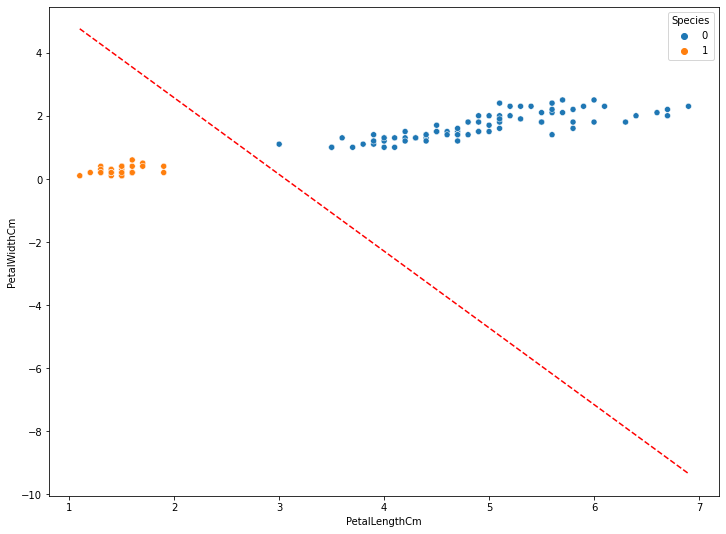

In [191]:
plt.figure(figsize=(12, 9))

data_scaled = X_train.copy()
data_scaled["Species"] = y_train

sns.scatterplot(data=data_scaled,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")


x_support = np.linspace(data_scaled["PetalLengthCm"].min(), 
                        data_scaled["PetalLengthCm"].max(), 101)
y_support = m_boundary*x_support + c_boundary

plt.plot(x_support, y_support, "--r")
# plt.set_ylim(-6, 6)

plt.show()

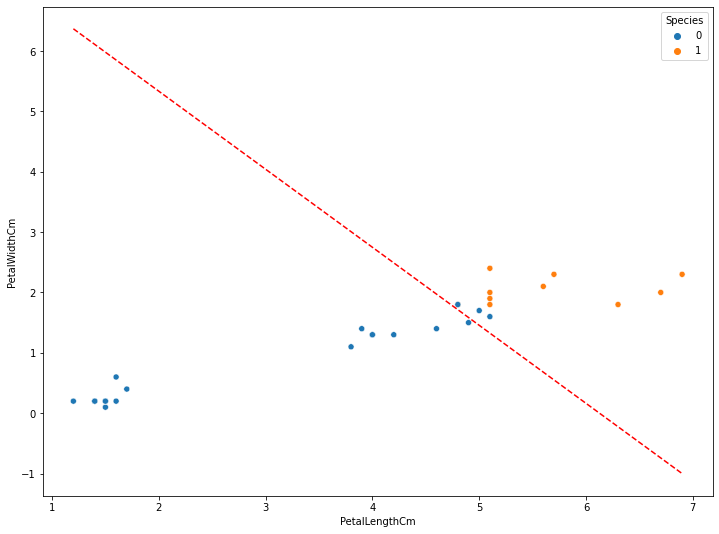

In [199]:
plt.figure(figsize=(12, 9))

data_scaled = X_test.copy()
data_scaled["Species"] = y_test

sns.scatterplot(data=data_scaled,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")


x_support = np.linspace(data_scaled["PetalLengthCm"].min(), 
                        data_scaled["PetalLengthCm"].max(), 101)
y_support = m_boundary*x_support + c_boundary

plt.plot(x_support, y_support, "--r")
# plt.set_ylim(-6, 6)

plt.show()